### Calculate Morse Potential for Any Spherical-Colloid Depletion Experiment

This notebook converts information about any depletion-based spherical colloid experiment into a set of parameters for the Morse Potential. 

**A standard simulation with Morse assumes that your particles are stabilized to behave like hard spheres.** They are not sticky or patchy, they do not interact with each other outside of depletion, their surface charge (including charge from any surface coating or polymer brush) is balanced by added salt, etc.

#### You need to provide the following information:

| value    | units   |
| :-------- | :------- |
| depletant molar mass   | $M_d$ *[g/Mol]* |
| depletant concentration | $c_d$ *[mg/mL = g/L]* |
| depletant overlap concentration     | $c^*$ *[mg/mL = g/L]* |
| solvent density  | $\rho_s$ *[g/mL = kg/L]* |
| solvent dynamic viscosity  | $\eta$ *[Pa s = (kg/(m*$s^2$))*s]* |
| colloid particle volume fraction  | $\phi$ |
| average colloid particle diameter(s)  | $D_c$ *[meter]* |
| colloid particle density | $\rho_c$ *[g/mL = kg/L]* |
| the time (since the sample was mixed) when your data was collected  | $t$ *[sec]* |

*Jump to Calculation*<br>
*What if I don't know $c^*$ for this experimental system?*<br>
*More about the Morse Potential*<br>
*Mathematical Form*<br>
*More about simulating Morse*<br>

#### What if I don't know $c^*$ for this experimental system?
- If you know $c^*$ for a the same polymer in a similar solvent (but, for example, with a different molar mass), then you can approximate $c^*$ in your system using the `calculate_cstar` function, which requires the ratio of depletant molar masses ($M_{reff}/M_{new}$) and the Flory exponent $\nu$

In [1]:
# [OPTIONAL] 
# calculate_cstar
# if you know $c^*$ for the same depletant in a similar solvent, but with a different molar mass, 
#   you can approximate it with this calculation

M_new = 150000          # depletant molar mass (number average Mn or weight average Mw) [g/Mol]
c_star_ref = 9.93       # c* for the same depletant (but with different molar mass) in a similar solvent
M_ref = 185700          # molar mass of the reference depletant
solv_quality = 'good'   # solvent quality, must be 'good' 'theta' or 'poor'

def calculate_cstar(c_star_ref, M_ref, M_new, solv_quality):
    # set the Flory exponent based on solvent quality
    if solv_quality == 'good':
        nu = 3/5
    elif solv_quality == 'theta':
        nu = 1/2
    elif solv_quality == 'poor':
        nu = 1/3
    else:
        print('ERROR: solv_qual must be "good", "theta", or "poor"')
        exit(1)
    c_star_new = c_star_ref*(M_ref/M_new)**nu # scaled polymer depletant overlap concentration [g/L]
    print('c_star =',round(c_star_new,2),'mg/mL')
    return round(c_star_new,2)

c_star = calculate_cstar(c_star_ref, M_ref, M_new, solv_quality)

c_star = 11.29 mg/mL


#### More about the Morse Potential
- The Morse Potential was introduced by Philip Morse in 1929 as an exact solution for harmonic interactions in a diatomic molecule</br>
  [DOI: 10.1103/PhysRev.34.57](https://doi.org/10.1103/PhysRev.34.57)
- In 2010, Taffs et.al. showed that the Morse Potential can describe an Asakura-Oosawa-Vrij (AO) type fluid with more accuracy than the standard one-component AO description used by the Depletion Potential<br>
  [DOI: 10.1088/0953-8984/22/10/104119](https://doi.org/10.1088/0953-8984/22/10/104119)
- In 2014, Zia et.al used the Morse potential to study the micro-mechanical coarsening and rheology of colloidal gels, establishing it as a model of choice for colloidal gel rheology<br>
  [DOI 10.1122/1.4892115](https://doi.org/10.1122/1.4892115)

**Assumptions**
- The Morse potential assumes that particles are hard spheres
- The depletant-to-colloid size ratio is assumed to be $\Delta<0.154$ 
  - The standard (one-component) AO Depletion model can only ignore higher order (3-body+) interactions when the ratio of depltant-to-colloid size is $\Delta=r_g/R_C<0.154$ ; for $\Delta=0.15$ Morse is an exact match for Depletion. Above this value there may be non-negligible many-body effects
- The attraction range is set by $\alpha=3/r_g$
  - The width of the Morse potential well is set by an $\alpha$ parameter; Zia et.al. showed that when $\Delta=0.1$, $\alpha=30R_C$ ; therefore, you approximate $\alpha$ for any system using $\alpha=3/r_g$

#### Mathematical Form: Morse vs. Depletion

| <div style="width:350px">Morse Potential</div> | <div style="width:350px">Depletion Potential (one-component AO)</div> |
|:-----------------:|:--------------------------:|
| $U_{morse}(r) = U_0 \left( e^{-2\alpha(r-r_0)} - 2e^{-\alpha(r-r_0)} \right) $ |  $U_{AO}(r)=-\Pi \: V_{ov}(r)$ |
| $$U_0=U_{morse}(r_0)=D_0 k_B T$$ $$r_0 = R_{Ci}+R_{Cj}$$ | $\Pi=n_bk_BT$ ; $n_b=\left( \frac{1}{1-\phi_C}\right) \left( \frac{c_d N_A}{M} \right)$ $$V_{ov}(r)=\frac{\pi}{6} \left( 2r_g - h \right)^2 \left( 3\langle R_C \rangle +2r_g \frac{h}{2} \right)$$ $h = r-r_0$ ; $ \langle R_C \rangle = 2 \left( \frac{R_{Ci}R_{Cj}}{R_{Ci}+R_{Cj}} \right) $ $$r_g = \left( \frac{3M}{4\pi N_A c^*} \right)^{1/3}$$|


| <div style="width:390px">Morse Parameters</div> | <div style="width:40px">symbol</div> |
|------------------|--------|
| attraction strength | $D_0$ | 
| attraction range parameter | $\alpha$ | 
| center-center particle separation distance | $r$ | 
| particle radii | $R_{Ci}$ ; $R_{Cj}$ |
| center-center distance at particle contact | $r_0 = R_{Ci} + R_{Cj}$ |
| temperature scale (Boltzmann constant * Temperature) | $k_B T$ |

| <div style="width:400px">Depletion Parameters</div> | <div style="width:40px">symbol</div> |
|----------------------|--------|
| osmotic pressure (Van 't Hoff equation) | $\Pi$ |
| depletion zone overlap volume | $V_{ov}$ |
| depletant concentration | $c_d$|
| depletant overlap concentration | $c^*$|
| depletant size (radius of gyration) | $r_g$ |
| depletant number density | $n_b$ |
| colloidal volume fraction | $\phi_C$ |
| depletant molar mass: number average ($M_n$) or weight average ($M_w$) | $M$ |
| Avogadro's number | $N_A$ |
| depletant size (radius of gyration) | $r_g$ |
| center-center particle separation distance | $r$ |
| particle radii | $R_{Ci}$ ; $R_{Cj}$ |
| center-center distance at particle contact | $r_0 = R_{Ci} + R_{Cj}$ |
| surface-surface separation distance | $h=r-r_0$ |
| temperature scale (Boltzmann constant * Temperature) | $k_B T$ |



#### Simulating Morse
In simulation all parameters are non-dimensionalized, this calculation uses the following conversions:
  | parameter | units |
  |:-----------:|:-------:|
  | length | smallest colloidal particle radius $R_{C,min}$|
  | mass | colloid mass $m_C$ scaled by volume times a system-wide number-density value $V_C \cdot \rho_{sim}$ |
  | energy | $k_B T = 0.1$ |
  | time | bare colloid diffusion time approximated from the Stokes–Einstein–Sutherland equation $\tau_D=(R_C)^2/D$ |

*Note:* In simulation, there are effectively 2 time conversions: a conversion to real time, and an internal simulation timescale that can be calculated from the [length], [mass], and [energy] parameters; these value do NOT match because, due to numerical constraints, simulation uses an idealized relationship between momentum diffusivity (kinematic viscosity) and mass diffusivity. The resulting Schmidt number is on the order of 1, when in reality the Schmidt number is on the order of millions. The take-away here is that any constant that uses time should be normalized via energy scaling, and you should use diffusion time to compare colloidal simulations with real results.

#### Calculate Morse Potential Parameters

In [2]:
# define inputs

# DEPLETANT
c_d = 5                 # depletant concentration [mg/mL = g/L]
M_d = 150000            # depletant molar mass (number average Mn or weight average Mw) [g/Mol]
c_star = 11.29          # overlap concentration [mg/mL = g/L]

# SOLVENT
eta = 0.0363            # solvent dynamic viscosity [Pa s = (kg/(m*s^2))*s]
rho_s = 1.194           # solvent density [g/mL = kg/L]

# COLLOIDS
phi = 0.1               # volume fraction of colloids
D_C = 1.1e-6            # colloid diameter [meter]
rho_c = 1.254           # colloid density [g/mL = kg/L]

# EXPERIMENT
data_time = 1*60*60     # approximate time between sample-mixing and sample-imaging [sec]


# SIMULATION
dt_Integration = 0.001  # simulation timestep
period = 10000          # simulation recording interval
sim_R_C = 1             # sim colloid radius [length]
sim_eta0 = 0.3          # solvent viscosity parameter
sim_rho = 3             # number density (multiply by mass units for [mass]/[length]^3)
sim_kT = 0.1            # unit of energy/temperature

In [3]:
# required packages
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# constants
# ---------
T = 298                                # room temperature [K]
k_B = 1.381e-23                        # Boltzmann constant [J/K]
kT = k_B*T                             # energy unit kT
epsilon_0 = 8.854e-12                  # permittivity of free space [F/m = (C^2 s^2)/(kg m^3)]
e_charge = 1.602e-19                   # electron charge [C]
Na = 6.022e23                          # Avogadro's number [#/Mol]
L_m3_conversion = 1000                 # 1000 L per m^3 (1L = 0.001m^3)
g_real = 9.81                          # acceleration due to gravity (on Earth) [m/s^2]

# calculate polymer radius of gyration from c_star
# -----------------------------------------------
r_g = (M_d/(Na*(4/3)*np.pi*c_star*1e3))**(1/3)           # polymer radius of gyration [m]
print('DEPLETANT')
print(' - depletant radius of gyration r_g =',round(r_g/1e-9,3),'nm')
print(' - depletion attraction range 2*r_g =',round((2*r_g)/1e-9,3),'nm')

print('\nCOLLOIDS')
# calulate the colloid radius and deplant-colloid ratio
# -----------------------------------------------------
R_C = 0.5*D_C
delta = r_g/R_C
print(' - depletant:colloid ratio, delta =',round(delta,3))

# calculate colloid mass (assuming perfect spherical particle)
# ------------------------------------------------------------
rho_c_m3 = rho_c * L_m3_conversion     # kg/L * 1000L/m^3 = [kg/m^3]
V_C = (4/3)*np.pi*R_C**3               # volume of a perfectly spherical particle [m^3]
mass_C = V_C * rho_c_m3                # estimated mass of one colloid [kg]
print(' - approximate mass per colloid, mass_C =',round((mass_C*1000)/1e-9,4),'nanograms')

# timescale
# ---------
# Use the Stokes–Einstein–Sutherland equation for diffusion of spherical particles 
# through a liquid with low Reynolds number to approximate the colloid diffusion time
# ---------
D = kT / (6*math.pi*eta*R_C)           # Diffusion coefficient for colloids
tau_D = round((R_C)**2 / D)            # bare particle diffusion time [s]

print(' - approximate colloid diffusion time =',tau_D,'s')
print(' - data collected at ~',round((data_time)/tau_D),'diffusion times')

print('\nDEPLETION')
# DEPLETION POTENTIAL
# -------------------
# Calcualte the Asakura-Oosawa-Vrij type Depletion Potential
# for more information on this calculation, see:
#   Lekkerkerker Ruinier Vis Colloids and the Depletion Interaction, 2nd Edition (https://doi.org/10.1007/978-3-031-52131-7) 
#   Section 2.1 Depletion Interaction Due to Penetrable Hard Spheres, page 67
# -------------------
def depletion(r, R_C1, R_C2, r_g, c_d):
    
    n_d = c_d * L_m3_conversion * (1/M_d) * Na    # depletant bulk number density : [g/L] * [L/m3] * [Mol/g] * [#/Mol] = [#/m3]
    n_d_free = n_d/(1-phi)                        # depletant number density in available solvent volume
    Pi_dynamic = n_d_free #* kT                   # osmotic pressure [J/m^3] / kT = [kT/m^3]
    h = r - (R_C1 + R_C2)                         # surface-surface separation distance [m]
    
    overlap_distance = np.where(h < 0, 0, np.maximum(0, (2 * r_g) - h))  # zero overlap if h > 2r_g OR h < 0
    
    # standard form: R_i = R_j -> R_C ; (3 * (2*(R_C1*R_C2/(R_C1+R_C2))) + 2 * r_g + h / 2)
    # for polysdisperse systems: R_i != R_j -> R_C = <R_C> = 2*(R_C1*R_C2/(R_C1+R_C2)))
    overlap_volume = (np.pi / 6) * overlap_distance**2 * (3 * (2*(R_C1*R_C2/(R_C1+R_C2))) + 2 * r_g + h / 2)
    
    return -Pi_dynamic * overlap_volume                                   # [kT/m^3] * [m^3] = [kT]

D0 = -depletion((2*R_C), R_C, R_C, r_g, c_d) #/ (k_B*T)
print(' - attraction strength at particle contact (potential well minimum) : D0 =', round(D0,2),'kT')

# gravity
print('\nGRAVITY')
# -------
# Calculate a dimensionless gravitational Peclet number settling/resistance
# -------
rho_c_meters = rho_c * L_m3_conversion # kg/L -> kg/m^3
rho_s_meters = rho_s * L_m3_conversion # kg/L -> kg/m^3
delta_rho = rho_c_meters-rho_s_meters

def GravPeclet(R_C, delta_rho, g_real, k_B, T):
  settling = (4/3)*np.pi*R_C**3*delta_rho*g_real
  resistance = (k_B*T)/R_C

  Pe = settling/resistance
  return(Pe)

Pe_real = GravPeclet(R_C, delta_rho, g_real, k_B, T)
F_G_real = Pe_real * (k_B*T/R_C)
print(' - Gravitational Peclet number for colloids is',round(Pe_real,4))
print(' - real F_G per colloid =',F_G_real,'N (kg m/s^2)')

print('\n')
# ----------------------
# simulation conversions
# ----------------------
t1 = period * dt_Integration            # simulation time per frame [time]
sim_V_C = (4/3)*np.pi*sim_R_C**3        # volume of a sim colloid 
sim_mass_C = sim_V_C * sim_rho          # mass of a sim colloid [mass]

# [length]
sim_length = R_C                        # m/[length]

# [energy]
sim_energy = kT/sim_kT                  # J/[energy]

# [mass]
sim_mass = mass_C / sim_mass_C          # kg/[mass]

# [time]
sim_D = sim_kT/(6*math.pi*sim_eta0*sim_R_C) # diffusion coefficient = r^2 / tau
sim_tau_D = (sim_R_C**2)/(sim_D)        # bare particle diffusion time [time]
sim_time = tau_D / sim_tau_D            # s/[time]

print('Conversions for [length], [energy], [mass], and [time] calculated\n')

sim_time_tauD = t1/sim_tau_D                # diffusion time per frame
s_per_frame = sim_time_tauD * tau_D         # s/[time] -- how many seconds per sim frame?
#nframes = data_time / s_per_frame  # [time]   -- how many frames to match exp time?
nframes = np.ceil(data_time/tau_D) / sim_time_tauD

sim_R_C = round(R_C/sim_length)

print('how much time per frame?           |',round(s_per_frame),'s =',round(sim_time_tauD,2),'diffusion times')
print('how many frames to match exp time? |',int(np.ceil(nframes)),'frames =',round(np.ceil(nframes)*sim_time_tauD,2),'diffusion times')

print('\n  - simulation colloid size, sim_R_C =',sim_R_C)

# Define Morse Potential

def morse(r, R_C1, R_C2, D_0, alpha):
    h_ij = r - (R_C1+R_C2)
    morse_potential = D_0 * (np.exp(-2 * alpha * h_ij) - 2 * np.exp(-alpha * h_ij))
    return morse_potential

D0 = round(D0)
print('  - D0 = U0/kT ~',D0)
alpha = round(round((3/(r_g/sim_length))))
print('  - alpha ~',alpha)


# simulation gravity
# ------------------
# momentum works differently in simulation vs reality due to Schmidt number mis-match, so do NOT use the real time conversion
# instead, use energy based scaling: J = kg * m^2 / s^2 --> m/s^2 = J/(kg*m) = [energy]/([mass]*[length])
# NOTE: this is also how HOOMD-blue calculates "time": [time] = sqrt(([mass]*[length]**2)/[energy])
g_sim = g_real / (sim_energy/(sim_mass*sim_length))
print('  - g in sim units = ',round(g_sim,4))

sim_delta_rho = delta_rho * (sim_length**3/sim_mass)

def GravPeclet_sim(sim_R_C, sim_delta_rho, g_sim, sim_kT):
  settling = (4/3)*np.pi*sim_R_C**3*(sim_delta_rho)*g_sim
  resistance = sim_kT/sim_R_C

  Pe = settling/resistance
  return(Pe)

Pe_sim = GravPeclet_sim(sim_R_C, sim_delta_rho, g_sim, sim_kT)
print('  - Pe in sim units = ',round(Pe_sim,4),'(should be same as real Pe!)')
F_G_sim = Pe_sim * sim_kT/1
print('  - sim F_G per unit length =',round(F_G_sim,4))

print('\nSCHMIDT NUMBER')
# Schmidt number
# --------------
# for numerical efficienty, momentum is not the same in simulation as it is in experiment;
# therefore, the Schmidt number (the ratio of momentum diffusivity over mass diffusivity) is always
# significantly different than in experiment
# You can check this for yourself:
# Schmidt Number = (kinematic viscosity $\nu$ / Diffusion coefficient D) = dynamic visocisty $\mu$ / (fluid density $\rho_s$ * D)
Sc_real = eta / (rho_s_meters * D)
Sc_real_millions = Sc_real / 1e6

Sc_sim = sim_eta0 / ((rho_s_meters*(sim_length**3/sim_mass))*sim_D)

print(' - real Schmidt number:',round(Sc_real_millions),'million')
print(' - Schmidt number in simulation:',round(Sc_sim))

DEPLETANT
 - depletant radius of gyration r_g = 17.399 nm
 - depletion attraction range 2*r_g = 34.798 nm

COLLOIDS
 - depletant:colloid ratio, delta = 0.032
 - approximate mass per colloid, mass_C = 0.0009 nanograms
 - approximate colloid diffusion time = 28 s
 - data collected at ~ 129 diffusion times

DEPLETION
 - attraction strength at particle contact (potential well minimum) : D0 = 23.82 kT

GRAVITY
 - Gravitational Peclet number for colloids is 0.0548
 - real F_G per colloid = 4.102012085311383e-16 N (kg m/s^2)


Conversions for [length], [energy], [mass], and [time] calculated

how much time per frame?           | 5 s = 0.18 diffusion times
how many frames to match exp time? | 730 frames = 129.09 diffusion times

  - simulation colloid size, sim_R_C = 1
  - D0 = U0/kT ~ 24
  - alpha ~ 95
  - g in sim units =  0.0091
  - Pe in sim units =  0.0548 (should be same as real Pe!)
  - sim F_G per unit length = 0.0055

SCHMIDT NUMBER
 - real Schmidt number: 2780 million
 - Schmidt numb

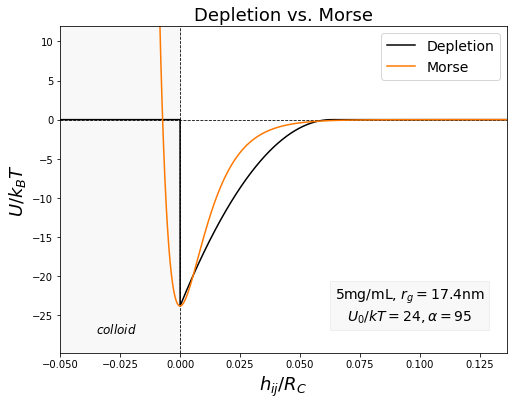

In [5]:
# PLOT DEPLETION AND MORSE POTENTIAL
r_min = 1e-11
r_max = 1.2e-6 # plot range (must extend beyond R_C_bare+R_C_bare+2*r_g)
r = np.linspace(r_min, r_max, 100_000)
bare_contact = 2*R_C
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Potential calculations
D_0 = -depletion(bare_contact, R_C, R_C, r_g, c_d)
U_morse = morse(r, R_C, R_C, D_0, alpha/R_C)
U_depl = depletion(r, R_C, R_C, r_g, c_d)



### PLOT MORSE vs. DEPLETION POTENTIAL
plt.figure(figsize=(8, 6))

plt.title(r"Depletion vs. Morse", fontsize=18)
plt.xlabel("$h_{ij}/R_C$", fontsize=18)
plt.ylabel(r"$U / k_B T$", fontsize=18)

# add reference lines
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') # zero interaction
plt.axvline(0, color='black', linewidth=0.8, linestyle='--') # colloid-colloid contact

# label colloid zone
plt.axvspan(-r_max / 1e-9, 0, alpha=0.05, color='grey')
plt.text(0.08, 0.05, '$colloid$', fontsize=12,
            horizontalalignment='left', verticalalignment='bottom', 
            transform=plt.gca().transAxes)

# include parameter label
experimental_param = f"{c_d}mg/mL, $r_g=${round(r_g/1e-9,2)}nm"
morse_param = f"$U_0/kT={round(D_0)}, \\alpha={round(alpha)}$"
props = dict(boxstyle='square', facecolor='grey', alpha=0.05)
plt.text(0.95, 0.2, f"{experimental_param}\n{morse_param}", transform=plt.gca().transAxes, 
         fontsize=14, verticalalignment='top', horizontalalignment='right', multialignment='center', bbox=props)

plt.plot((r-bare_contact) / R_C, U_depl, ls='-', lw='1.5', color='black', label='Depletion')
plt.plot((r-bare_contact) / R_C, U_morse, ls='-', lw='1.5', color='#ff7800', label='Morse') 

#plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1,0.5))
plt.legend(fontsize=14, loc='upper right')

plt.xlim(-0.05, 0.75*(r_max-bare_contact)/R_C)
plt.ylim((-1.25*D_0),(0.5*D_0))

#plt.grid(True)

plt.show()